# EDA and visulization of Airbnd dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/airbnd.csv")

<ipython-input-2-2028f32d49f1>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/airbnd.csv")


In [ ]:
df.head(3)

id                                 NAME      host id  \
0  1001254   Clean & quiet apt home by the park  80014485718   
1  1002102                Skylit Midtown Castle  52335172823   
2  1002403  THE VILLAGE OF HARLEM....NEW YORK !  78829239556   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  

[3 rows x 26 columns]

In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

# Checking MIssing values

In [ ]:
print(df.isnull().mean())

id                                0.000000
NAME                              0.002437
host id                           0.000000
host_identity_verified            0.002817
host name                         0.003957
neighbourhood group               0.000283
neighbourhood                     0.000156
lat                               0.000078
long                              0.000078
country                           0.005185
country code                      0.001277
instant_bookable                  0.001023
cancellation_policy               0.000741
room type                         0.000000
Construction year                 0.002086
price                             0.002407
service fee                       0.002661
minimum nights                    0.003986
number of reviews                 0.001784
last review                       0.154904
reviews per month                 0.154768
review rate number                0.003177
calculated host listings count    0.003109
availabilit

# changing data types

In [ ]:
df['last review'] = pd.to_datetime(df['last review'],errors='coerce')

# Dealing with Missing values

In [ ]:
df.fillna({'reviews per month':0, 'last review' :df['last review'].min()},inplace=True)

In [ ]:
df.dropna(subset = ["NAME","host name","host_identity_verified","neighbourhood group","neighbourhood","lat","long","country","country code","instant_bookable","cancellation_policy","Construction year","price","service fee","minimum nights","number of reviews","review rate number","calculated host listings count","availability 365"],inplace=True)

In [ ]:
df =df.drop(columns=['license','house_rules'],errors='ignore')

In [ ]:
# removing $ sign from price
df['price'] = df['price'].replace('[\$,]','',regex=True).astype(float)

In [ ]:
# removing $ sign from service fee
df['service fee']=df['service fee'].replace('[\$,]','',regex=True).astype(float)

# Remove duplicates

In [ ]:
df.drop_duplicates(inplace=True)

# Outliers Identification and Handling

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


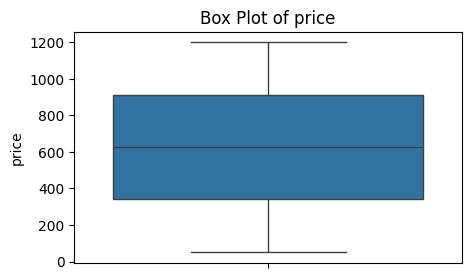

In [ ]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

plot_boxplot(df, "price")
# there is no outlier in price

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


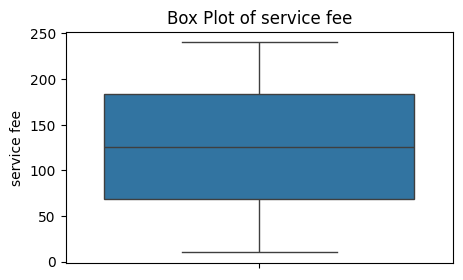

In [ ]:
plot_boxplot(df, "service fee")

# Checking outliers for minimum nights column

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


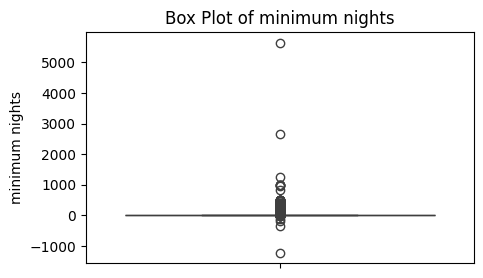

In [ ]:
plot_boxplot(df, "minimum nights")

In [ ]:
# Finding the IQR
percentile25 = df['minimum nights'].quantile(0.25)
percentile75 = df['minimum nights'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 9.5
Lower limit -2.5


# Handling outliers

In [ ]:
cleaned_df = df[(df['minimum nights'] >= lower_limit) & (df['minimum nights'] <= upper_limit)]

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


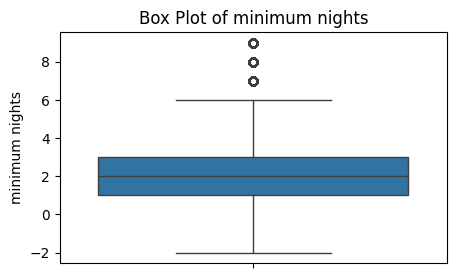

In [ ]:
plot_boxplot(cleaned_df, "minimum nights")

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


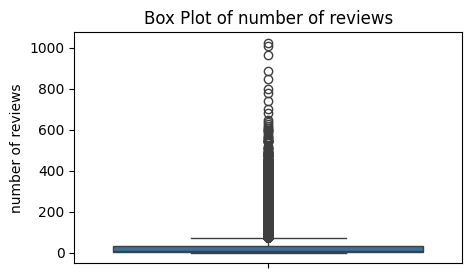

In [ ]:
plot_boxplot(df, "number of reviews")

In [ ]:
# Finding the IQR
percentile25 = df['number of reviews'].quantile(0.25)
percentile75 = df['number of reviews'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
lower_limit,upper_limit

(np.float64(-42.5), np.float64(73.5))

In [ ]:
cleaned_df = df[(df['number of reviews'] > lower_limit) & (df['number of reviews'] < upper_limit)]

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


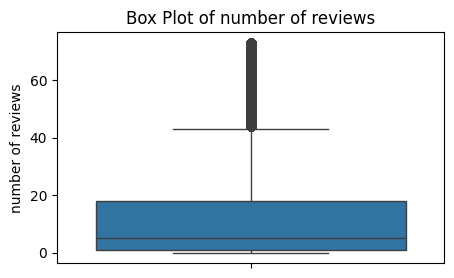

In [ ]:
plot_boxplot(cleaned_df, "number of reviews")

# Finding outliers of lat column

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


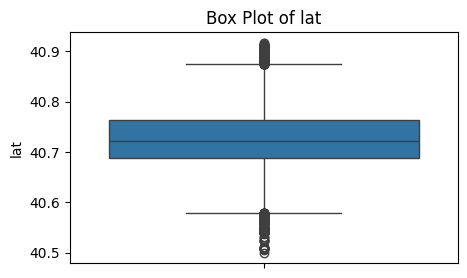

In [ ]:
plot_boxplot(df, "lat")

In [ ]:
# Finding the IQR
percentile25 = df['lat'].quantile(0.25)
percentile75 = df['lat'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
cleaned_df = df[(df['lat'] > lower_limit) & (df['lat'] < upper_limit)]

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


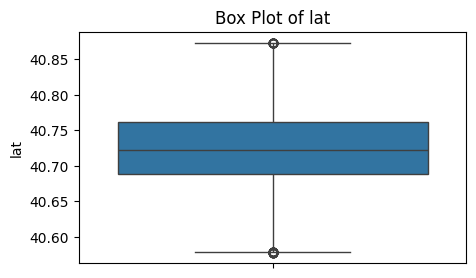

In [ ]:
plot_boxplot(cleaned_df, "lat")

# Finding outliers of long column

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


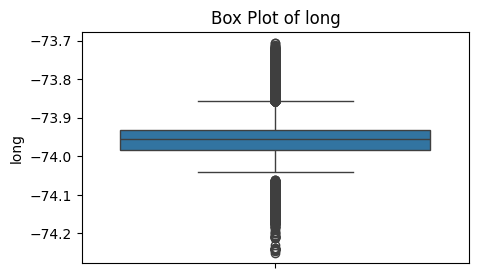

In [ ]:
plot_boxplot(df, "long")

In [ ]:
# Finding the IQR
percentile25 = df['long'].quantile(0.25)
percentile75 = df['long'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
cleaned_df = df[(df['long'] > lower_limit) & (df['long'] < upper_limit)]

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


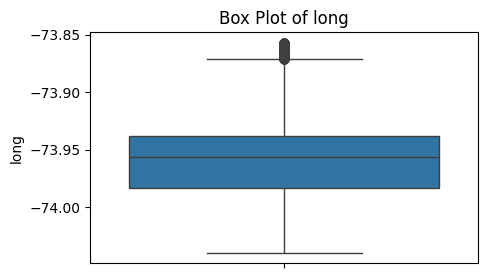

In [ ]:
plot_boxplot(cleaned_df, "long")

# Visualizations

# Bar charts for categorical variables

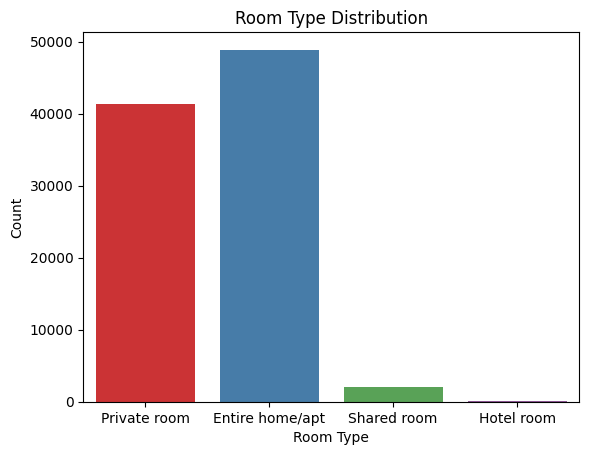

In [ ]:
# Define a palette with different colors for each bar
palette_colors = sns.color_palette("Set1")  # You can choose other palettes like "Set2", "Paired", or provide a list of colors

sns.countplot(data=cleaned_df, x='room type', palette=palette_colors)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

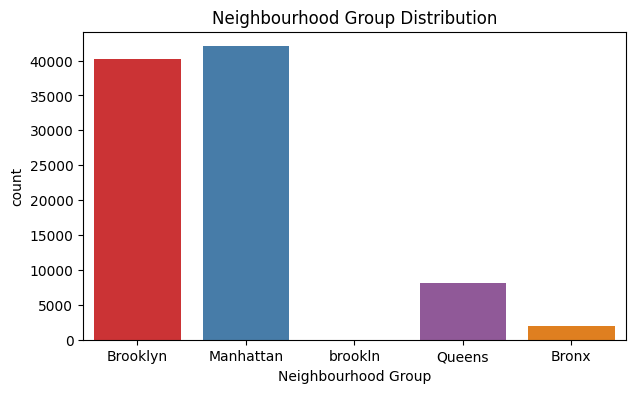

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=cleaned_df, x='neighbourhood group', palette=palette_colors)
plt.title('Neighbourhood Group Distribution')
plt.xlabel('Neighbourhood Group')
plt.show()

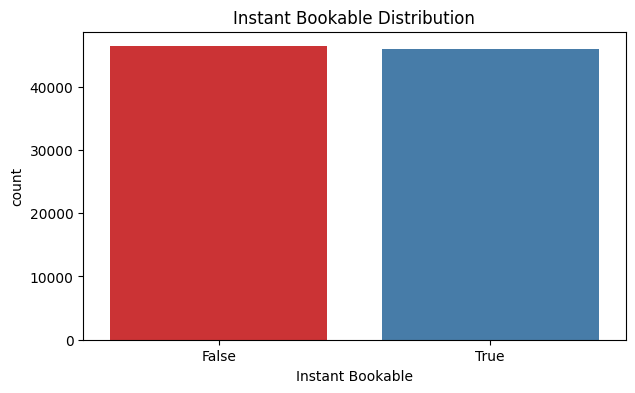

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=cleaned_df, x='instant_bookable', palette=palette_colors)
plt.title('Instant Bookable Distribution')
plt.xlabel('Instant Bookable')
plt.show()

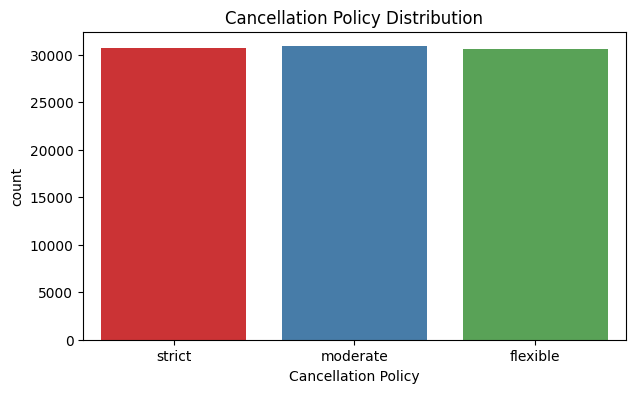

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=cleaned_df, x='cancellation_policy', palette=palette_colors)
plt.title('Cancellation Policy Distribution')
plt.xlabel('Cancellation Policy')
plt.show()

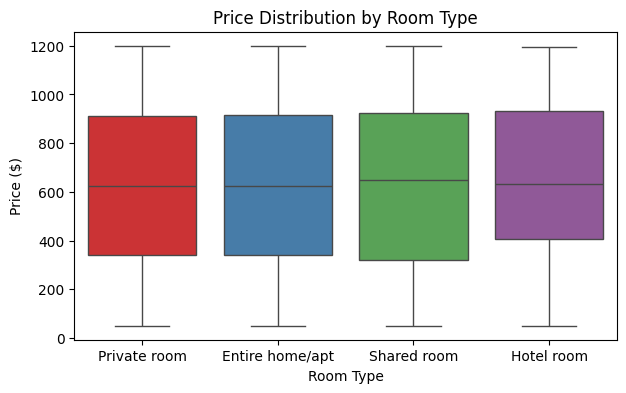

In [ ]:
# relationship between price and room type
plt.figure(figsize=(7, 4))
sns.boxplot(data=cleaned_df, x='room type', y='price', palette=palette_colors)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

# Histgrams plot for numeric distribution

In [ ]:
## All features histo
histograms = []
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'float64':
        fig = px.histogram(cleaned_df, x=column, title=f'Distribution of {column}')
        fig.update_traces(marker_color='hotpink')
        histograms.append(fig)

for histogram in histograms:
    histogram.show()

# Correlation Heatmap for Numerical features

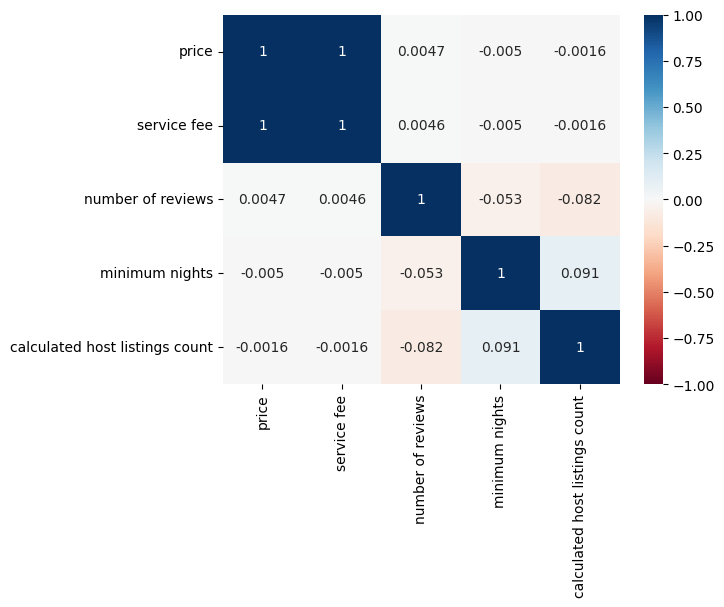

In [ ]:
subset = cleaned_df[['price', 'service fee', 'number of reviews', 'minimum nights', 'calculated host listings count']]
correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0)
plt.show()

# Exploratory Data Analysis (EDA) Report on Airbnb Listings Dataset
1. Objective
The purpose of this analysis is to explore and understand the Airbnb listings dataset, focusing on identifying key patterns and relationships among variables such as price, room type,negiborhood, availability, and reviews. These insights aim to help stakeholders make data-driven decisions regarding pricing strategies, marketing, and customer targeting.

2. Data Overview
The dataset contains approximately 2 lac listings with 26 attributes including numerical (price, number_of_reviews, availability_365 etc) and categorical variables (neighbourhood_group, room_type etc).

Key variables:

neighbourhood_group: Boroughs of NYC (Bronx, Brooklyn, Manhattan, Queens, Staten Island)

room_type: Entire home/apt, Private room, Shared room, Hotel room

price: Price per night in USD

number_of_reviews and reviews_per_month: Customer feedback metrics

availability_365: Number of days listing is available in a year

3. Data Cleaning
Missing Values: The missing values handled and removed

Duplicates: duplicate rows were removed in the dataset.

Outliers: outliers detected in many columns and removed

Data Types: Date columns were converted to datetime format for temporal analysis.

4. Visualizations and Findings
Categorical Variables
Bar Charts:
Manhattan and Brooklyn had the highest number of listings, followed by Queens and Bronx.

Entire homes/apartments were the most common room type, followed by private rooms.

Listings in Manhattan generally commanded higher prices.

Numerical Variables
Histograms:

Price distribution was heavily right-skewed, with most listings priced under $200 per night.

Number of reviews was also skewed, with many listings having few or no reviews.

Availability varied widely, with some listings available year-round and others sporadically.

Correlation Heatmap
Positive correlation observed between price and minimum_nights, indicating that listings requiring longer stays tend to be priced higher.

Negative correlation between availability_365 and number_of_reviews, suggesting that listings with higher availability may receive fewer reviews per month.

Moderate positive correlation between number_of_reviews and reviews_per_month.

5. Key Insights
Location Matters: Listings in Manhattan and Brooklyn tend to be more expensive and have higher demand.

Room Type Influence: Entire homes command higher prices and have different availability patterns compared to private or shared rooms.

Review Patterns: Listings with more reviews tend to have higher visibility and possibly better occupancy.